# **MOVIE_DATA_ANALYSIS🎥🎬🎞️🍿**

## **과제 2️⃣**
### 영화 평점과 흥행 수익 간의 상관관계 분석 

#### 사용자 평점, 비평가 평점, 박스오피스 수익 간의 관계를 분석하고, 평점이 높지만 흥행하지 못한 영화와 평점은 낮지만 흥행한 영화들의 특성을 비교 분석하세요.

#### **1. 상관관계 분석 및 산점도 시각화:**

평점(vote_average)과 흥행 수익(revenue) 두 변수 간의 관계를 산점도(scatter plot)로 그려보기.
x축을 평점, y축을 수익으로 두면 평점이 높을수록 수익이 높아지는 경향을 시각적으로 확인 가능.

상관관계 계수를 계산하여 두 변수 간의 선형적 관계 강도를 정량적으로 나타내기.

데이터를 성공적으로 불러왔습니다.


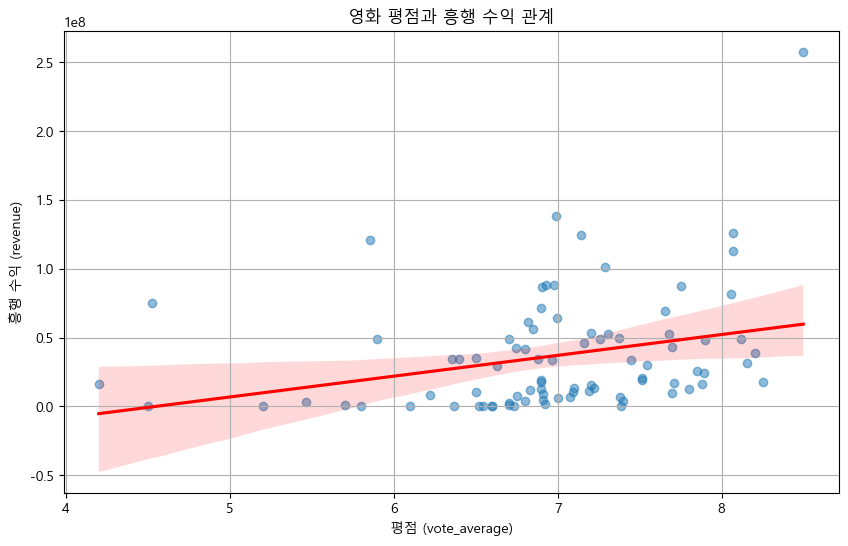


평점과 수익 간의 상관계수: 0.2928


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore', category=UserWarning)

# 한글 폰트 설정 (Windows 사용자용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기
file_path = 'tmdb_kr_theatrical_clean.csv'
try:
    df = pd.read_csv(file_path)
    print("데이터를 성공적으로 불러왔습니다.")
    
    # 2. 필요한 열 선택 (평점과 수익)
    df = df[['vote_average', 'revenue']]
    
    # 3. 데이터 정제: 0이거나 투표 수가 적은 데이터는 제외
    # (이미 전 단계에서 정제했다고 가정)
    
    # 4. 산점도(Scatter Plot) 그리기
    plt.figure(figsize=(10, 6))
    sns.regplot(x='vote_average', y='revenue', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title('영화 평점과 흥행 수익 관계')
    plt.xlabel('평점 (vote_average)')
    plt.ylabel('흥행 수익 (revenue)')
    plt.grid(True)
    plt.show()

    # 5. 상관계수(Correlation Coefficient) 계산
    correlation = df['vote_average'].corr(df['revenue'])
    print(f"\n평점과 수익 간의 상관계수: {correlation:.4f}")

except FileNotFoundError:
    print(f"오류: {file_path} 파일을 찾을 수 없습니다. 파일 경로를 다시 확인해주세요.")
except KeyError:
    print("오류: 데이터프레임에 'vote_average' 또는 'revenue' 열이 없습니다. 열 이름을 확인해주세요.")

**영화 평점과 흥행 수익 간의 관계를 나타내는 산점도**
- x축 (가로축): 평점(vote_average)
- y축 (세로축): 흥행 수익(revenue)
- 파란색 점: 개별 영화 데이터. 각 점의 위치는 해당 영화의 평점과 수익을 의미.
- 빨간색 선 (회귀선): 전체적인 데이터의 경향성을 보여주는 직선. 이 선은 평점이 높아질수록 수익도 증가하는 약한 양의 상관관계를 시각적으로 보여줌.
- 분홍색 영역 (신뢰 구간): 회귀선 주변의 분홍색 영역은 데이터가 이 범위 내에 존재할 확률이 높다는 것을 나타내는 신뢰 구간. 이 영역이 넓다는 것은 데이터가 회귀선 주변에 밀집되어 있지 않고 넓게 퍼져 있다는 뜻으로, 상관관계가 강하지 않다는 것을 다시 한번 확인시켜 줌.

**----------------------------------------------------------------------------------------------------------------------------------------------**

#### **2. 특이점(Outlier) 찾기 & 그룹별 특성 분석:**

산점도에서 평점은 높지만 수익은 낮은 영화, 또는 평점은 낮지만 수익은 높은 영화 등 일반적인 경향에서 벗어나는 점들을 찾아보기.
이 영화들의 이름을 별도로 리스트업하고 그 영화들의 특징을 살펴보기.
데이터를 정규화하고 높은 평점, 낮은 수익 그룹과 낮은 평점, 높은 수익 그룹 정의하여 각 그룹에 속한 영화들의 공통적인 특성 분석.

- 특이점(Outlier) 찾기
    -  MinMaxScaler를 사용해 정규화 시키기
        - 📈 MinMaxScaler (최소-최대 정규화):
        MinMaxScaler는 각 데이터 포인트를 0과 1 사이의 값으로 변환하는 일반적인 정규화 기법. 이 방법을 사용하면 데이터의 원래 분포는 유지하면서도 서로 다른 범위를 가진 변수들(예: 평점 0~10 vs. 수익 억 단위)을 동일한 척도로 비교 가능.

- 그룹별 특성 분석
    - 장르: 어떤 장르의 영화가 이 그룹에 많이 속해 있나요?
    - 제작 예산: 저예산 영화인가요, 아니면 고예산 영화인가요?

In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
from collections import Counter
import re


# 1. 데이터 불러오기
file_path = 'tmdb_kr_theatrical_clean.csv'
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='euc-kr')

# 2. 필요한 열만 추출
df = df[['title', 'vote_average', 'revenue', 'budget', 'genres', 'original_language', 'popularity']]

# 3. 데이터 정제
df = df[(df['revenue'] > 0) & (df['vote_average'] > 0)].copy()

# 4. 평점과 수익 정규화
scaler = MinMaxScaler()
df[['normalized_vote', 'normalized_revenue']] = scaler.fit_transform(df[['vote_average', 'revenue']])


# 5. 특이점 그룹 정의
high_vote_low_revenue_group = df[
    (df['normalized_vote'] >= df['normalized_vote'].quantile(0.7)) &
    (df['normalized_revenue'] <= df['normalized_revenue'].quantile(0.3))
]

low_vote_high_revenue_group = df[
    (df['normalized_vote'] <= df['normalized_vote'].quantile(0.3)) &
    (df['normalized_revenue'] >= df['normalized_revenue'].quantile(0.7))
]


# ✅ 6. 장르 추출 함수 (정규 표현식 방식)
def get_genres(df):
    all_genres = []
    genre_pattern = re.compile(r"'(.*?)'")  # 작은따옴표 안의 텍스트 추출

    for genres_str in df['genres'].astype(str).dropna():
        if genres_str.strip() in ['[]', 'nan']:
            continue

        genres_list = genre_pattern.findall(genres_str)
        all_genres.extend(genres_list)

    return Counter(all_genres)


# 7. 결과 출력
print("--- 높은 평점, 낮은 수익 그룹 (평점은 높지만 흥행 실패) ---")
display(high_vote_low_revenue_group[['title', 'vote_average', 'revenue', 'genres', 'budget']].sort_values(by='vote_average', ascending=False).head(10))

print("\n--- 낮은 평점, 높은 수익 그룹 (평점은 낮지만 흥행 성공) ---")
display(low_vote_high_revenue_group[['title', 'vote_average', 'revenue', 'genres', 'budget']].sort_values(by='revenue', ascending=False).head(10))

print("\n--- 높은 평점, 낮은 수익 그룹의 주요 장르 ---")
display(get_genres(high_vote_low_revenue_group).most_common(5))

print("\n--- 낮은 평점, 높은 수익 그룹의 주요 장르 ---")
display(get_genres(low_vote_high_revenue_group).most_common(5))

print(f"\n높은 평점, 낮은 수익 그룹의 평균 예산: ${high_vote_low_revenue_group['budget'].mean():,.2f}")
print(f"낮은 평점, 높은 수익 그룹의 평균 예산: ${low_vote_high_revenue_group['budget'].mean():,.2f}")


--- 높은 평점, 낮은 수익 그룹 (평점은 높지만 흥행 실패) ---


,title,vote_average,revenue,genres,budget
56,레드슈즈,7.700,10054356,"['애니메이션', '판타지', '가족', '코미디', '로맨스', '모험']",20000000
13,슈퍼맨이었던 사나이,7.400,3848034,"['코미디', '드라마', '로맨스']",4250000
59,공작,7.389,3175,"['드라마', '역사', '스릴러']",17000000
57,버닝,7.382,6591038,"['미스터리', '드라마', '스릴러']",7280000



--- 낮은 평점, 높은 수익 그룹 (평점은 낮지만 흥행 성공) ---


,title,vote_average,revenue,genres,budget
36,넛잡: 땅콩 도둑들,5.857,120885527,"['애니메이션', '코미디', '가족', '모험']",42000000
4,디 워,4.525,75108998,"['판타지', '드라마', '공포', '액션', '스릴러', 'SF']",32000000
48,인천상륙작전,5.900,49196532,"['역사', '드라마', '전쟁', '액션']",12700000
34,베를린,6.700,48965210,"['액션', '스릴러', '범죄']",9000000



--- 높은 평점, 낮은 수익 그룹의 주요 장르 ---


[('드라마', 3), ('코미디', 2), ('로맨스', 2), ('스릴러', 2), ('애니메이션', 1)]


--- 낮은 평점, 높은 수익 그룹의 주요 장르 ---


[('액션', 3), ('드라마', 2), ('스릴러', 2), ('판타지', 1), ('공포', 1)]


높은 평점, 낮은 수익 그룹의 평균 예산: $12,132,500.00
낮은 평점, 높은 수익 그룹의 평균 예산: $23,925,000.00


#### **시각화**

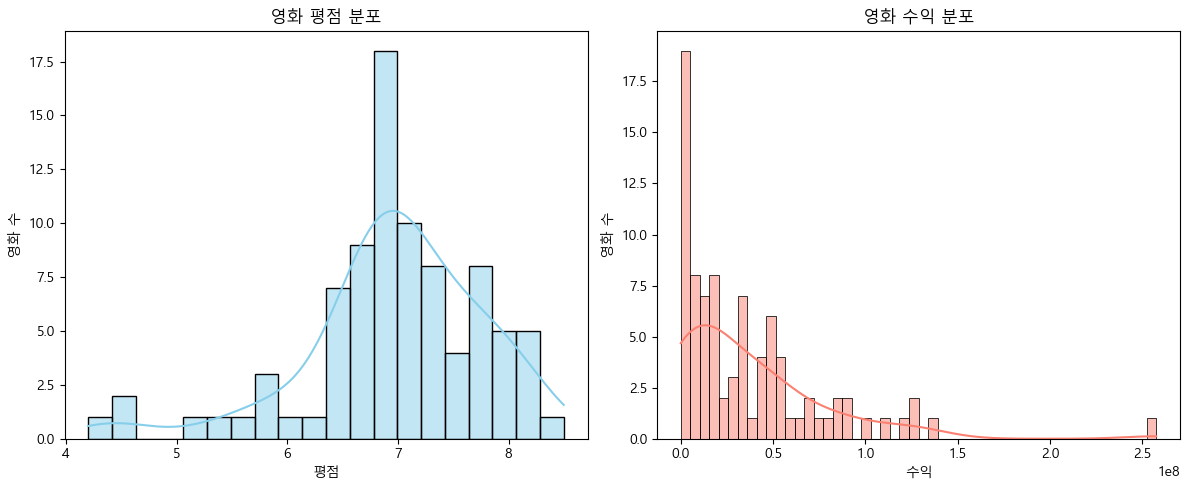

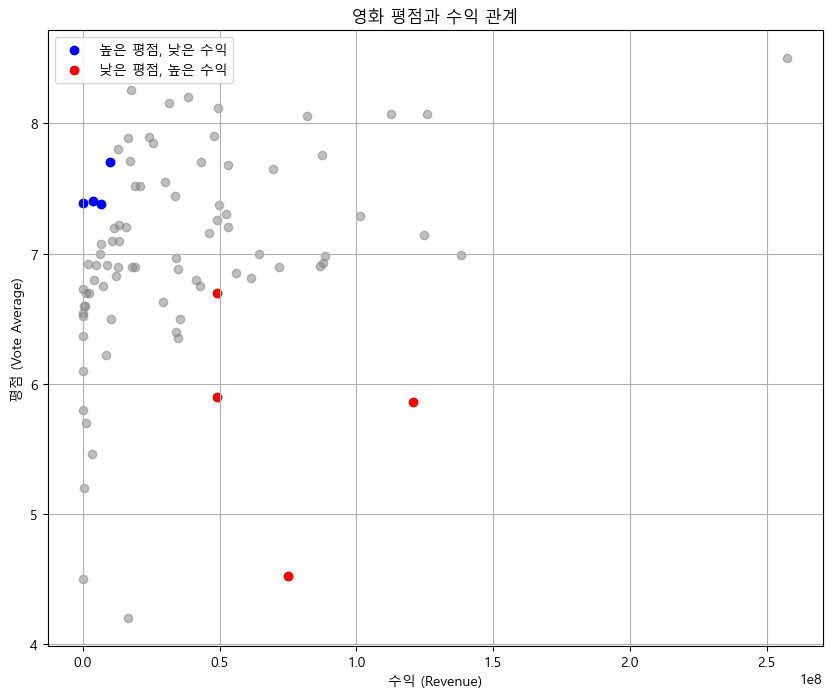

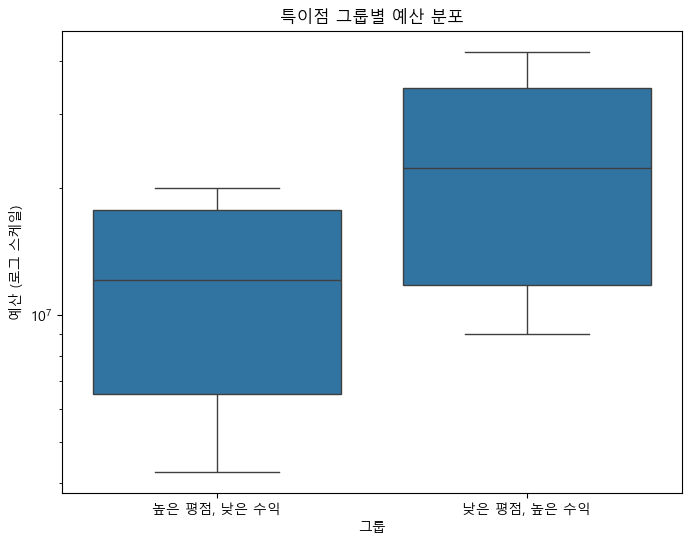

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 폰트 설정 (Windows 사용자용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# 평점 및 수익 분포 히스토그램
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['vote_average'], bins=20, kde=True, color='skyblue')
plt.title('영화 평점 분포')
plt.xlabel('평점')
plt.ylabel('영화 수')

plt.subplot(1, 2, 2)
sns.histplot(df['revenue'], bins=50, kde=True, color='salmon')
plt.title('영화 수익 분포')
plt.xlabel('수익')
plt.ylabel('영화 수')

plt.tight_layout()
plt.show()


# 평점 vs. 수익 산점도
plt.figure(figsize=(10, 8))
plt.scatter(df['revenue'], df['vote_average'], alpha=0.5, color='gray')
plt.scatter(high_vote_low_revenue_group['revenue'], high_vote_low_revenue_group['vote_average'], color='blue', label='높은 평점, 낮은 수익')
plt.scatter(low_vote_high_revenue_group['revenue'], low_vote_high_revenue_group['vote_average'], color='red', label='낮은 평점, 높은 수익')
plt.title('영화 평점과 수익 관계')
plt.xlabel('수익 (Revenue)')
plt.ylabel('평점 (Vote Average)')
plt.legend()
plt.grid(True)
plt.show()


# 예산 분포 비교 (상자 그림)
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='budget', data=pd.concat([
    high_vote_low_revenue_group.assign(group='높은 평점, 낮은 수익'),
    low_vote_high_revenue_group.assign(group='낮은 평점, 높은 수익')
]))
plt.yscale('log')
plt.title('특이점 그룹별 예산 분포')
plt.ylabel('예산 (로그 스케일)')
plt.xlabel('그룹')
plt.show()

**1. 영화 평점 및 수익 분포 (히스토그램)**
- 영화 평점 분포 (왼쪽): 이 그래프는 대부분의 영화가 6점에서 8점 사이의 비교적 높은 평점에 집중되어 있음을 보여줌. 평점은 7점 부근에 가장 많은 영화가 몰려 있어, 종 모양의 정규분포와 유사한 경향을 보임. 이는 대다수 영화가 보통 이상의 평점을 기록하지만 극단적으로 낮거나 높은 평점의 영화는 드물다는 것을 의미.

- 영화 수익 분포 (오른쪽): 이 그래프는 수익이 0에 가까운 낮은 값에 집중되어 있고 수익이 높을수록 영화 수가 급격히 줄어드는 오른쪽으로 치우친(right-skewed) 분포를 보임. 이는 영화 시장에서 소수의 블록버스터 영화가 전체 수익의 대부분을 차지하고 대다수 영화는 상대적으로 낮은 수익을 기록한다는 사실을 나타냄.

- 왜도(Skewness)는 데이터가 한쪽으로 치우쳐 있는 정도를 나타내는 통계적 척도. KDE 곡선의 모양을 보면 데이터가 어느 방향으로 길게 꼬리를 늘어뜨리고 있는지 한눈에 알 수 있음.
    - 영화 평점 분포(왼쪽 그래프): KDE 곡선이 정중앙을 기준으로 비교적 대칭적인 종 모양을 띠고 있음. 이는 평점 데이터가 한쪽으로 크게 치우치지 않고 균형 잡힌 분포를 보인다는 것을 의미.
    - 영화 수익 분포(오른쪽 그래프): KDE 곡선이 왼쪽(낮은 수익)에 대부분의 영화 수가 몰려 있고 오른쪽(높은 수익)으로 길고 완만한 꼬리를 늘어뜨리고 있음. 이것은 '오른쪽으로 치우친(Positive Skewness)' 분포를 명확하게 보여줌. 즉, 극소수의 영화가 압도적인 높은 수익을 기록하고 대부분의 영화는 낮은 수익을 냈다는 것을 시각적으로 확인할.


**2. 영화 평점과 수익 관계 (산점도)**

이 산점도는 영화의 **평점(Y축)**과 **수익(X축)** 간의 관계를 보여줌.

- 회색 점: 전체 영화 데이터를 나타내며 대부분의 영화가 낮은 수익과 다양한 평점 범위에 넓게 분포하고 있음을 보여줌.

- 파란색 점: '높은 평점, 낮은 수익' 그룹을 나타냄. 이 영화들은 평점은 높지만 수익은 매우 낮은 좌측 상단에 위치하며 작품성은 뛰어나지만 흥행에는 실패한 영화들.

- 빨간색 점: '낮은 평점, 높은 수익' 그룹을 나타냄. 이 영화들은 평점은 낮지만 수익은 높은 우측 하단에 위치하며 평가는 좋지 않았지만 상업적으로 성공한 영화들.

**3. 특이점 그룹별 예산 분포 (상자 그림)**

이 상자 그림은 로그 스케일로 변환된 예산을 사용하여 두 특이점 그룹의 예산 분포를 비교함.

- 높은 평점, 낮은 수익 그룹 (왼쪽): 이 그룹의 예산 중앙값(상자 안의 가로선)은 낮은 범위에 위치함. 이는 영화 자체의 완성도(평점)와 무관하게 상대적으로 적은 제작비가 흥행 부진의 한 원인이 될 수 있음을 시사.

- 낮은 평점, 높은 수익 그룹 (오른쪽): 이 그룹의 예산 중앙값은 왼쪽 그룹보다 훨씬 높은 범위에 위치함. 이는 작품성에 대한 낮은 평가에도 불구하고 막대한 예산이 마케팅, 시각 효과 등 흥행 요소에 사용되어 상업적 성공을 이끌었을 가능성이 높음을 보여줌.